In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ranksums
from jmetal.core.algorithm import Algorithm
from jmetal.core.quality_indicator import *
from jmetal.util.solution import print_function_values_to_file, print_variables_to_file, read_solutions

In [2]:
def get_row(df, p, e, i):
    return df[(df["Problem"] == p) & (df["Evaluations"] == e) & (df["IndicatorName"] == i)]

# create dataframe

In [172]:
all_df = pd.read_csv("corrections-normals-summary.csv")

In [3]:
import time

def get_median_values(df):
    algorithms = df["Algorithm"].unique()    
    problems = df["Problem"].unique()
    evaluations = df["Evaluations"].unique()
    indicators = df["IndicatorName"].unique()

    t = time.time()
    rows = []
    for a in algorithms:
        print(a)
        for p in problems:
            print("\t {} - {}".format(p, time.time() - t))
            t = time.time()
            for e in evaluations:
                for i in indicators:
                    values = (df[(df["Algorithm"] == a) & (df["Problem"] == p) 
                          & (df["Evaluations"] == e) & (df["IndicatorName"] == i)]["IndicatorValue"])

                    new_row = [a, p, e, i, np.median(values)]
                    rows.append(new_row)

    median_df = pd.DataFrame(rows, columns=["Algorithm", "Problem", "Evaluations", "IndicatorName", "IndicatorMedianValue"])

    return median_df

In [4]:
#median_df = get_median_values(df)

In [5]:
def calculate_performance_comparison(df):
    algos = df["Algorithm"].unique()
    problems = df["Problem"].unique()
    evaluations = [i for i in range(1000, 10000, 1000)] + [i for i in range(10000, 110000, 10000)] #df["Evaluations"].unique()
    indicators = df["IndicatorName"].unique()

    t = time.time()
    rows = []
    cache = {}
    for i in range(len(algos)):
        a = algos[i]
        other_algos = np.delete(algos, i)
        print(a)
        for p in problems:
            print("\t {} - {}".format(p, time.time() - t))
            t = time.time()
            for e in evaluations:
                for i in indicators:
                    cache_key = "{},{},{}".format(p,e,i)
                    performance = 0
                    values = []
                    median = 0

                    if not (cache_key in cache):
                        cache[cache_key] = {}

                    if (cache_key in cache) and (a in cache[cache_key]):
                        values = cache[cache_key][a]["values"]
                        median = cache[cache_key][a]["median"]
                    else:
                        values = (df[(df["Algorithm"] == a) & (df["Problem"] == p) 
                                  & (df["Evaluations"] == e) & (df["IndicatorName"] == i)]["IndicatorValue"])
                        median = np.median(values)
                        cache[cache_key][a] = {}
                        cache[cache_key][a]["values"] = values
                        cache[cache_key][a]["median"] = median

                    for other_a in other_algos:
                        other_values = []
                        other_median = 0
                        pvalue = 1
                        
                        in_cache = (cache_key in cache) and (other_a in cache[cache_key])
                        if in_cache and (a in cache[cache_key][other_a]): # pvalue is in cache
                            pvalue = cache[cache_key][other_a][a]
                            other_median = cache[cache_key][other_a]["median"]
                        else:
                            if in_cache:
                                other_values = cache[cache_key][other_a]["values"]
                                other_median = cache[cache_key][other_a]["median"]
                            else:
                                other_values = (df[(df["Algorithm"] == other_a) & (df["Problem"] == p) 
                                      & (df["Evaluations"] == e) & (df["IndicatorName"] == i)]["IndicatorValue"])
                                other_median = np.median(other_values)
                                cache[cache_key][other_a] = {}
                                cache[cache_key][other_a]["values"] = other_values
                                cache[cache_key][other_a]["median"] = other_median

                            pvalue = ranksums(values, other_values).pvalue
                        cache[cache_key][a][other_a] = pvalue

                        if pvalue < 0.05:
                            if i == "IGD" and median > other_median:
                                performance += 1
                            elif i == "HV" and median < other_median:
                                performance += 1

                    new_row = [a, p, e, i, median, performance]
                    rows.append(new_row)

    performance_df = pd.DataFrame(rows, columns=["Algorithm", "Problem", "Evaluations", "IndicatorName", "IndicatorMedianValue", "PerformanceComparison"])
    return performance_df

In [241]:
#performance_df = calculate_performance_comparison(all_df)

CMPSO
	 DASCMOP1(5) - 0.0001819133758544922


/Users/syuen/Documents/cmlsga-jmetalpy/env/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/syuen/Documents/cmlsga-jmetalpy/env/lib/python3.11/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/ms/h3ls_bd53pd36z2c3sq8qz2w0000gr/T/ipykernel_73017/494608995.py:59: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  pvalue = ranksums(values, other_values).pvalue


	 DASCMOP1(6) - 58.39179515838623
	 DASCMOP1(7) - 58.36087107658386
	 DASCMOP2(5) - 58.220447063446045
	 DASCMOP2(6) - 58.31225872039795
	 DASCMOP2(7) - 58.157429933547974
	 DASCMOP3(5) - 58.32399535179138
	 DASCMOP3(6) - 58.01055693626404
	 DASCMOP3(7) - 58.15867805480957
	 DASCMOP4(5) - 58.387133836746216
	 DASCMOP4(6) - 58.09688091278076
	 DASCMOP4(7) - 58.163331031799316
	 DASCMOP5(5) - 58.61473107337952
	 DASCMOP5(6) - 58.487465143203735
	 DASCMOP5(7) - 58.23065710067749
	 DASCMOP6(5) - 58.10250401496887
	 DASCMOP6(6) - 58.14258313179016
	 DASCMOP6(7) - 58.03176808357239
	 DTLZ1 - 58.46496891975403
	 DTLZ2 - 57.81410884857178
	 DTLZ3 - 57.66641688346863
	 DTLZ4 - 57.65962100028992
	 DTLZ5 - 57.55193591117859
	 DTLZ6 - 57.570632219314575
	 DTLZ7 - 57.74686002731323
	 IMB1 - 57.61143088340759
	 IMB10 - 57.748286962509155
	 IMB11 - 57.745952129364014
	 IMB12 - 57.701403856277466
	 IMB13 - 57.62950921058655
	 IMB14 - 57.403627157211304
	 IMB2 - 57.42742085456848
	 IMB3 - 57.8002309799

In [6]:
median_df = pd.read_csv("corrections-normals-median.csv")
performance_df = pd.read_csv("corrections-normals-performance-comparison.csv")

In [31]:
performance_df["Problem"].unique()

array(['DASCMOP1(5)', 'DASCMOP1(6)', 'DASCMOP1(7)', 'DASCMOP2(5)',
       'DASCMOP2(6)', 'DASCMOP2(7)', 'DASCMOP3(5)', 'DASCMOP3(6)',
       'DASCMOP3(7)', 'DASCMOP4(5)', 'DASCMOP4(6)', 'DASCMOP4(7)',
       'DASCMOP5(5)', 'DASCMOP5(6)', 'DASCMOP5(7)', 'DASCMOP6(5)',
       'DASCMOP6(6)', 'DASCMOP6(7)', 'DTLZ1', 'DTLZ2', 'DTLZ3', 'DTLZ4',
       'DTLZ5', 'DTLZ6', 'DTLZ7', 'IMB1', 'IMB10', 'IMB11', 'IMB12',
       'IMB13', 'IMB14', 'IMB2', 'IMB3', 'IMB4', 'IMB5', 'IMB6', 'IMB7',
       'IMB8', 'IMB9', 'LZ09_F1', 'LZ09_F2', 'LZ09_F3', 'LZ09_F4',
       'LZ09_F5', 'LZ09_F6', 'LZ09_F7', 'LZ09_F8', 'LZ09_F9', 'MOP1',
       'MOP2', 'MOP3', 'MOP4', 'MOP5', 'MOP6', 'MOP7', 'UF1', 'UF2',
       'UF3', 'UF4', 'UF5', 'UF6', 'UF7', 'UF8', 'UF9', 'WFG1', 'WFG2',
       'WFG3', 'WFG4', 'WFG5', 'WFG6', 'WFG7', 'WFG8', 'WFG9', 'ZDT1',
       'ZDT2', 'ZDT3', 'ZDT4', 'ZDT6'], dtype=object)

# plots

In [40]:
all_problems = {
    "DASCMOP(5)": ["DASCMOP{}(5)".format(i) for i in range(1, 7)],
    "DASCMOP(6)": ["DASCMOP{}(6)".format(i) for i in range(1, 7)],
    "DASCMOP(7)": ["DASCMOP{}(7)".format(i) for i in range(1, 7)],
    "DTLZ": ["DTLZ{}".format(i) for i in range(1, 8)],
    "IMB": ["IMB{}".format(i) for i in range(1, 15)],
    "LZ09": ["LZ09_F{}".format(i) for i in range(1, 10)],
    "MOP": ["MOP{}".format(i) for i in range(1, 8)],
    "WFG": ["WFG{}".format(i) for i in range(1, 10)],
    "UF": ["UF{}".format(i) for i in range(1, 10)],
    "ZDT": ["ZDT{}".format(i) for i in [1, 2, 3, 4, 6]]
}
#HV ONLY
def create_aps_df(df):
    algorithms = df["Algorithm"].unique()
    evaluations = df["Evaluations"].unique()
    rows = []

    for problem_set_name, problems in all_problems.items():
        for e in evaluations:
            perf = {}
            for a in algorithms:
                average_performance = [
                    performance_df[(performance_df["Algorithm"] == a) & (performance_df["Evaluations"] == e) 
                        & (performance_df["IndicatorName"] == "HV") & (performance_df["Problem"] == p)
                    ]["PerformanceComparison"]
                    for p in problems
                ]
                perf[a] = np.average(average_performance)
            rows.append([problem_set_name, e, "HV"] + [perf[a] for a in algorithms])
    
    return pd.DataFrame(rows, columns=["ProblemSet", "Evaluations", "IndicatorName"] + list(algorithms))
            
    

In [41]:
aps_df = create_aps_df(performance_df)

In [42]:
aps_df

,ProblemSet,Evaluations,IndicatorName,CMPSO,Epsilon-IBEA,HEIA,MOEAD,OMOPSO,SMPSO,U-NSGA-III
0,DASCMOP(5),1000,HV,1.166667,0.833333,0.0,0.833333,0.500000,0.000000,1.166667
1,DASCMOP(5),2000,HV,2.166667,0.833333,0.0,1.333333,0.500000,0.000000,1.666667
2,DASCMOP(5),3000,HV,2.500000,0.666667,0.0,1.000000,0.666667,0.000000,1.833333
3,DASCMOP(5),4000,HV,2.500000,0.666667,0.0,1.166667,0.666667,0.166667,1.666667
4,DASCMOP(5),5000,HV,2.500000,0.333333,0.0,1.000000,1.000000,0.166667,1.500000
...,...,...,...,...,...,...,...,...,...,...
185,ZDT,60000,HV,1.600000,1.000000,5.8,4.000000,3.800000,2.600000,1.600000
186,ZDT,70000,HV,1.600000,1.000000,5.6,3.800000,3.600000,2.400000,1.200000
187,ZDT,80000,HV,1.600000,1.000000,5.6,3.800000,3.600000,2.600000,1.200000
188,ZDT,90000,HV,1.600000,1.000000,5.6,3.600000,3.600000,2.600000,1.200000


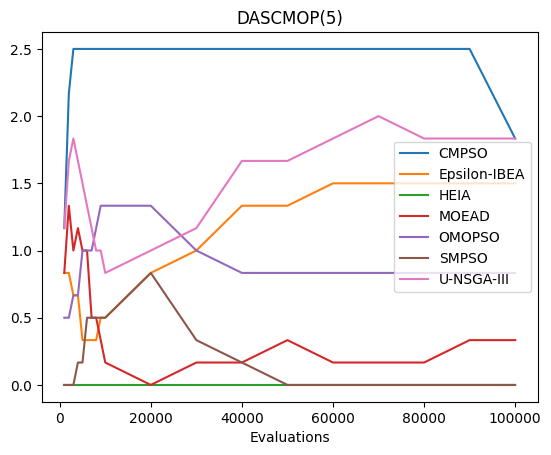

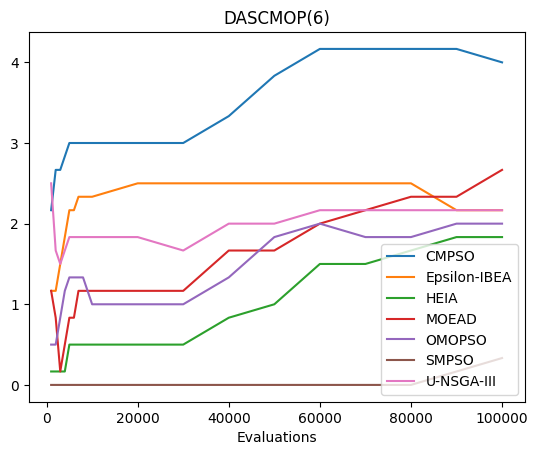

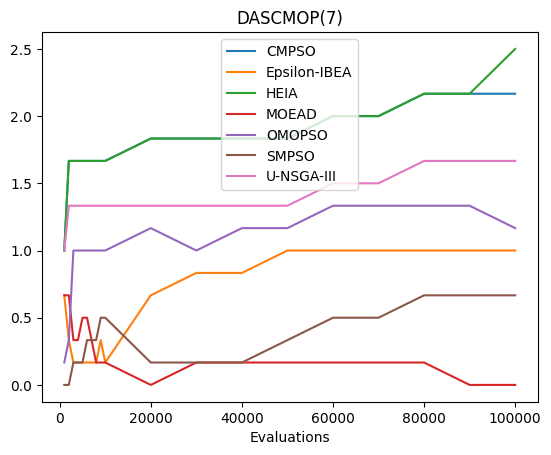

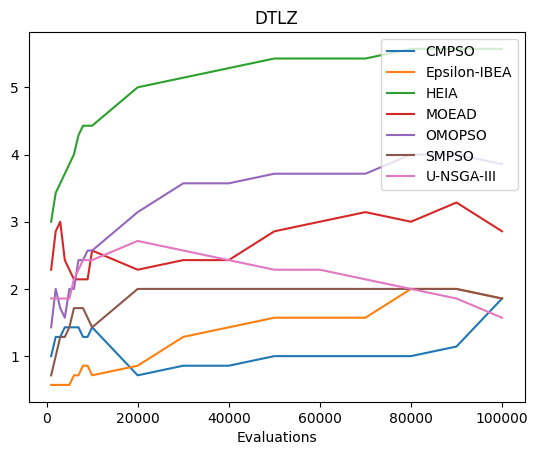

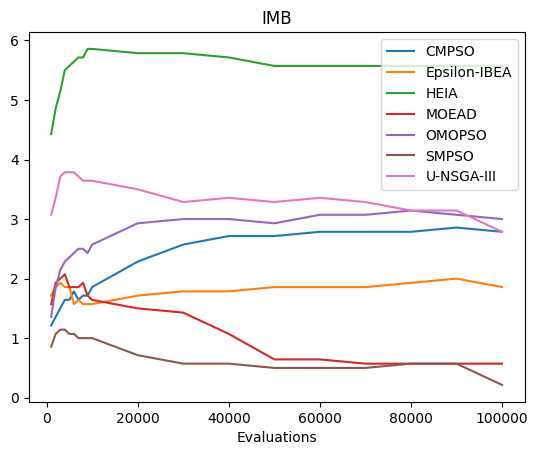

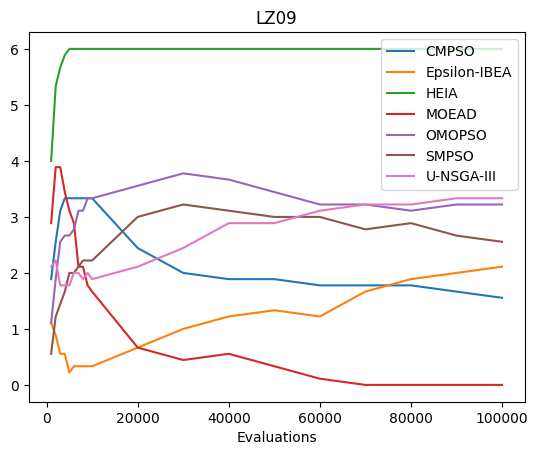

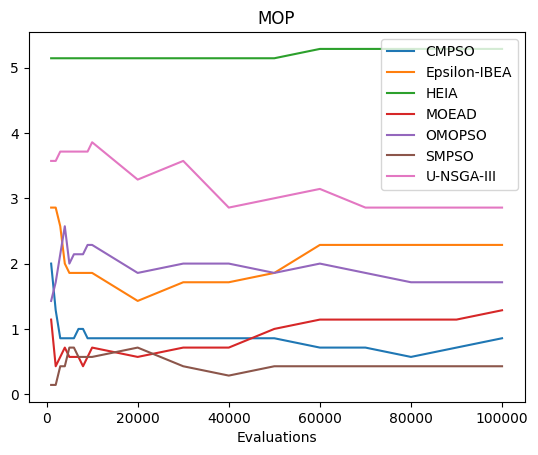

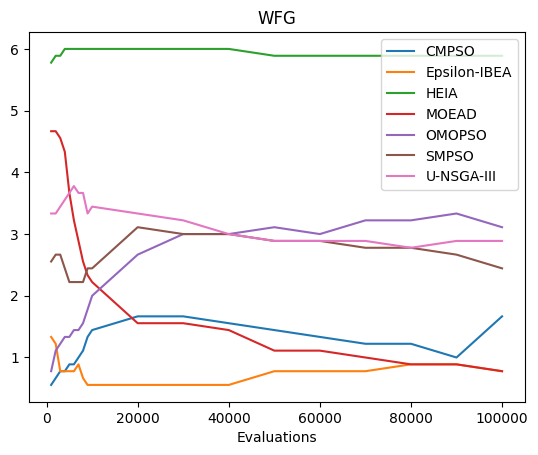

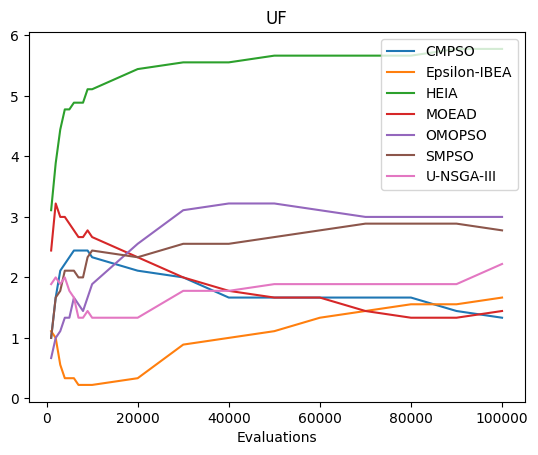

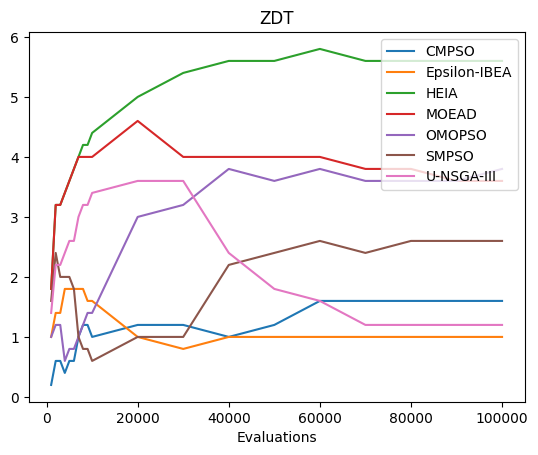

In [43]:
for problemset in aps_df["ProblemSet"].unique():
    aps_df[aps_df["ProblemSet"] == problemset].plot("Evaluations", y=list(algorithms), title=problemset)